# **Credit customers  data analysis**

### In this ipybn file, a cleaning and analysis of approved and disapproved credit customers data is shown. One and two variable analysis are made in order to obtain a general description of the dataset. A machine learning algorithm is applied to make predictions. 

 Data was obtained from Kaggle and has the next citation:

Jan van Rijn. (2023). credit_risk_customers [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/3119852

Data has the next fields:

***1. checking_status:***  Status of existing checking accoun.

***2.duration:***  In months.

***3.credit_history:***  Credits taken, paid back duly, delays, critical accounts.

***4. purpose:*** Purpose of the credit.

***5. credit_amount:*** Amount of credit. 

***6. savings_status:*** Status of savings account/bond.

***7. employment*** Present employment, in number of years.

***8. installment_commitment:*** Installment rate in percentage of disposable income.

***9.personal_status:*** Sex and marital data.

***10.other_parties:*** Other debtors / guarantors.

***11. residence_since<sup>1</sup>:*** Years living on actual residence.

***12. property_magnitude<sup>1</sup>:*** Customer's property might  be used as guarantee. 

***13. age<sup>1</sup>:*** In years.

***14. other_payment_plans<sup>1</sup>:*** Has the customer a payment plan?.

***15. housing<sup>1</sup>:*** Status of customer living place.

***16.existing_credits<sup>1</sup>:*** Is the customer actually indebted?.

***17. job<sup>1</sup>:*** Customer job status.

***18. num_dependents<sup>1</sup>:*** How many people depends on the customer?.

***19. own_telephone<sup>1</sup>:***  Has the customer an own telephone? 

***20. foreign_worker<sup>1</sup>:*** Is the customer a foreing worker?

***21. class<sup>1</sup>:*** If the customer is aprproved or disapproved.



<sup>1</sup>: Fields without description provided by the dataset author. The descriptions presented in these fields are only an interpretation of the autor of this file.

 
## **1. Preliminary view and cleaning**

In [1]:
# Needed libraries:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# To be able to change dataframe field values: 
pd.set_option('future.no_silent_downcasting', True)

In [2]:
# Import data:
df = pd.read_csv('credit_customers.csv')

# Dimensions of dataframe:
print(df.shape)

# First 5 rows:
df.head()

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


We note there are some float fields, but the only float type field is the *'credit_amount'*, the others can be integers. Moreover, paying attention to minimum and maximum values of these integers:

In [3]:
df.describe().iloc[[3,-1]]

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
min,4.0,250.0,1.0,1.0,19.0,1.0,1.0
max,72.0,18424.0,4.0,4.0,75.0,4.0,2.0


We realize that integer fields has values between 0 and 75 (150 at almost). Considering the fact that an int 32 covers since -2147483648 to 2147483647, we can change  the type of fields to int 32 and reduce the storage memory:

In [4]:
print('bytes with float format:', sys.getsizeof(df))
print('bytes with Int32 format:',sys.getsizeof(df.astype({'duration':int,'installment_commitment':int,'residence_since':int,'age':int,'existing_credits':int,'num_dependents':int})))

# Stablish the change:
df = df.astype({'duration':int,'installment_commitment':int,'residence_since':int,'age':int,'existing_credits':int,'num_dependents':int})

bytes with float format: 960100
bytes with Int32 format: 936100


Also, separate categorical and numerical variables:


In [5]:
categorical_var = ['checking_status','purpose','personal_status','class','credit_history','job','employment','other_payment_plans','other_parties','foreign_worker','housing','property_magnitude','own_telephone','savings_status']
integer_var = ['duration', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
numerical_var = integer_var + ['credit_amount']

# There are the 21 fields still. 
print(len(numerical_var)+len(categorical_var))

21


And look for na and null values:

In [6]:
# Null and Na values:
pd.DataFrame({'Null': df.isna().sum(), 'Na': df.isna().sum()})

,Null,Na
checking_status,0,0
duration,0,0
credit_history,0,0
purpose,0,0
credit_amount,0,0
savings_status,0,0
employment,0,0
installment_commitment,0,0
personal_status,0,0
other_parties,0,0


There are not Na and Null values to delete. 

We search for incongruent values (for example, negative *duration* values or *age* and *residence_since* values grow than 100 years). To do this, we observe data distribution through a violin and box plot visualization:

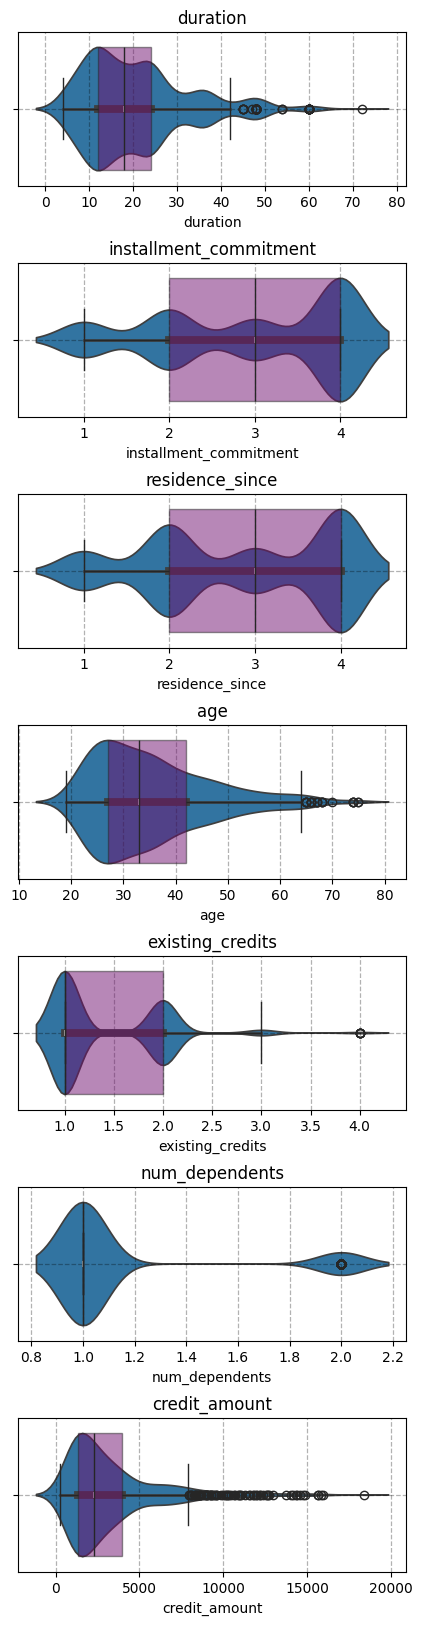

In [7]:
fig, ax = plt.subplots(nrows = len(numerical_var), ncols = 1, figsize = (5,20))
fig.subplots_adjust(hspace = 0.5)
  
for i, var in enumerate(numerical_var):
    sns.violinplot(x = var, data = df, ax = ax[i])
    sns.boxplot(x = var, data = df, ax = ax[i], boxprops=dict(alpha=0.5), color='purple')
    ax[i].grid(alpha=0.3, color='black', ls='--', lw=0.9)
    ax[i].set_title(var)

There's nothing out of the ordinary.

Respect categorical variables, we see how many categories has each one of them:

In [8]:
for var in categorical_var:
    print(f'There are {df[var].nunique()} categories in var {var}')

There is 4 categories in var checking_status
There is 10 categories in var purpose
There is 4 categories in var personal_status
There is 2 categories in var class
There is 5 categories in var credit_history
There is 4 categories in var job
There is 5 categories in var employment
There is 3 categories in var other_payment_plans
There is 3 categories in var other_parties
There is 2 categories in var foreign_worker
There is 3 categories in var housing
There is 4 categories in var property_magnitude
There is 2 categories in var own_telephone
There is 5 categories in var savings_status


To see all categories of each variable, we build the frequencies' histogram of each of them:

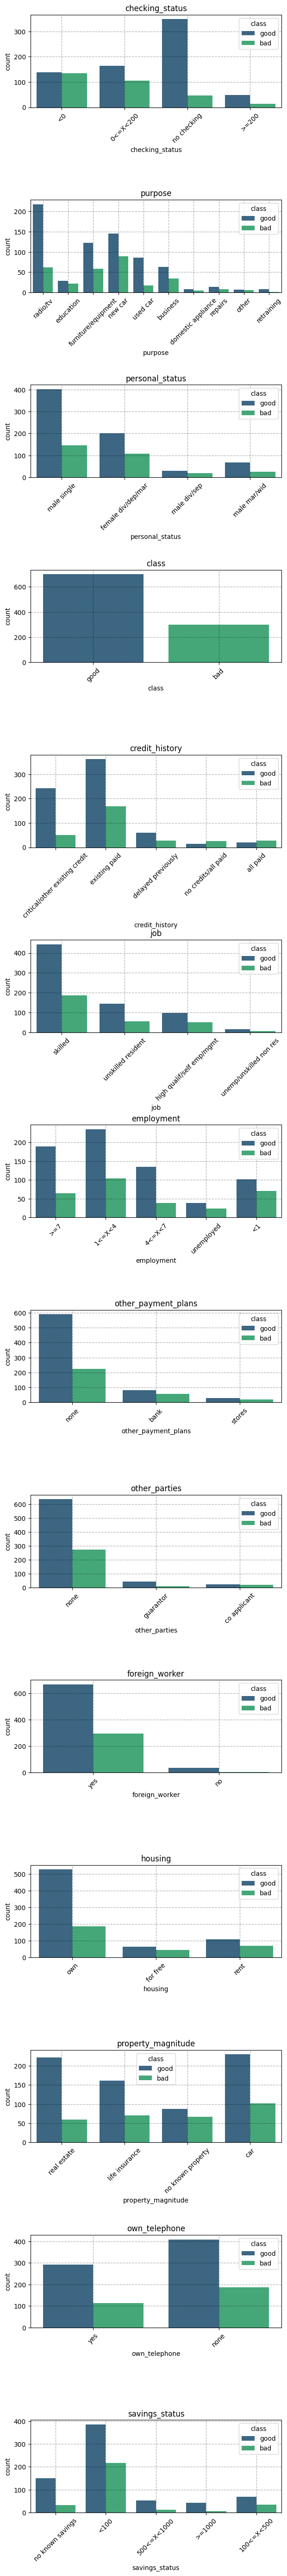

In [9]:
fig, ax = plt.subplots(nrows=len(categorical_var), ncols=1, figsize=(7,70))
fig.subplots_adjust(hspace=1 )

for i, var in enumerate(categorical_var):
    sns.countplot(x=var, data=df, ax=ax[i], hue="class", palette="viridis")
    ax[i].set_title(var)
    ax[i].grid(alpha=0.3, color='black', ls='--', lw=0.9)
    plt.setp(ax[i].get_xticklabels(), rotation=45)


There are the next format observations:

**a)** In order to reduce the storage memory, we can make the next substitutions in '*saving_status*' variable:
$$100<=X<500  \rightarrow [500,1000)$$ 
$$500<=X<1000  \rightarrow [500,1000)$$ 
The next in '*employment*':
$$1<=X<4  \rightarrow [1,4)$$ 
$$4<=X<7  \rightarrow [4,7)$$ 
and the next in '*checking_status*':
$$0<=X<200  \rightarrow [0,200)$$ 


In [10]:
print('Bytes before substitutions: ', sys.getsizeof(df))

#Substitutions:
df['savings_status'] = df['savings_status'].replace('500<=X<1000', '[500,1000)')
df['savings_status'] = df['savings_status'].replace('100<=X<500', '[100,500)')

df['employment'] = df['employment'].replace('1<=X<4', '[1,4)')
df['employment'] = df['employment'].replace('4<=X<7', '[1,7)')

df['checking_status'] = df['checking_status'].replace('0<=X<200', '[0,200)')

print('Bytes after substitutions: ', sys.getsizeof(df))



Bytes before substitutions:  936100
Bytes after substitutions:  935152


In [11]:
# Check substitutions were made correctly:
df[['employment','savings_status', 'checking_status']].value_counts().tail(9)

employment  savings_status    checking_status
<1          >=1000            no checking        1
            [100,500)         <0                 1
            [500,1000)        <0                 1
[1,7)       [500,1000)        [0,200)            1
                              >=200              1
<1          no known savings  >=200              1
[1,7)       >=1000            <0                 1
>=7         [500,1000)        [0,200)            1
<1          [500,1000)        no checking        1
Name: count, dtype: int64

**b)** Because '*foreign_worker*', '*own_telephone*' and '*class*' are a two value variables, we can just substitute his values for 0 and 1 in order to reduce the storage memory:
$$yes, good \rightarrow True$$
$$no, none, bad \rightarrow False$$
However, we are planning to apply machine learning techniques and these substitutions might carry some manage data difficulties, so we make the next substitutions in *'class'* variable instead:
$$good \rightarrow 0$$
$$bad \rightarrow 1$$
the next in *'own_telephone'*: 
$$yes \rightarrow 2$$
$$none \rightarrow 3$$
and the next in *'foreing_worker'*:
$$yes \rightarrow 4$$
$$no \rightarrow 5$$

In [12]:
print('Bytes before substitutions: ', sys.getsizeof(df))

#substitutions:
df['class'] = df['class'].replace('good', 1)
df['class'] = df['class'].replace('bad', 0)

df['own_telephone'] = df['own_telephone'].replace('yes', 2)
df['own_telephone'] = df['own_telephone'].replace('none', 3)

df['foreign_worker'] = df['foreign_worker'].replace('yes', 4)
df['foreign_worker'] = df['foreign_worker'].replace('no', 5)

print('Bytes after substitutions: ', sys.getsizeof(df))

Bytes before substitutions:  935152
Bytes after substitutions:  860693


***c)*** The field *'credit history'* has two values for the same category: *all paid* and *no credits/all paid*. We conserve the value all paid

In [13]:
df['credit_history'] = df['credit_history'].replace('no credits/all paid', 'all paid')
df['credit_history'].value_counts()

credit_history
existing paid                     530
critical/other existing credit    293
all paid                           89
delayed previously                 88
Name: count, dtype: int64

***d)*** There are two different variables with the same ***none*** category. It will be a problem when apply one hot encoding technique so we replace one of them:

In [14]:
df['other_payment_plans'] = df['other_payment_plans'].replace('none', 'no')
df.other_payment_plans.value_counts()

other_payment_plans
no        814
bank      139
stores     47
Name: count, dtype: int64

***e)*** There is a type error in *'personal_status'*; We have to change 'dep' (whatever that means) for 'sep' (separated):

In [15]:
df['personal_status'] = df['personal_status'].replace('female div/dep/mar', 'female div/sep/mar')
df.personal_status.value_counts()

personal_status
male single           548
female div/sep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64

***Author's Note about personal_status field:*** 

If you want to be congruent with social agenda and don't differentiate between women,  men, etc. you just focus on the responsibility  possibilities: single (regardless of gender, they don't have or prefer don't have a commitment of that magnitude), mar/wid (they have and maintain a commitment like that), div/sep (they had and didn't maintain a commitment like that). On the other side, if you want to take a point of view a little bit more objective and consider  the differences between biologic genders that may influence the results, you have to consider a field gender, apart to the field personal status (single, marr/wid and div/sep). 

## **2. Analysis**

### ***2.1 Numerical variables***: 

From the violin and box plots above we have the next observations:

***Duration:*** The 50% of credit solicitations consider a duration between 11 and 24 months approximately. By watching the frequency distribution in the violin graph, we can expand that interval to 9 months to take account the most common solicitation durations.

***Credit_amount:*** In the 50% of cases customers solicit credit amounts between $1205 and $4000 approximately. In this case the interval can be extended from $500 to $4000 to contemplate the amount range with more solicitations. 

***installment_commitment:*** There is a  marked trend towards solicitations with a installment commitment rate of 4% 

***residence_since:*** Has a very similar behavior that *instalmment_commitment* variable.

***age:*** 50% of solicitations comes from ages between 27 and 42 years, approximately. The range of age can be extended to cover for 23 years.

***existing_credits:*** The bast majority of solicitations comes from people with 2 credits at most.

***num_dependents:*** The bast majority of solicitations comes from people who have 1 person depending on them.

### ***2.2 Categorical variables***: 

The bar graphs above show how many credit solicitations were approved and disapproved considering the values of the categorical variables. This lends us to have a preliminary visualization of the approved solicitations rate in an isolated way (a quantitative way is explored later). The following observations are made:

***Property_magnitude:*** Customer who have a car as guarantee makes more credit solicitations, followed by customers who have a real state property. However, the solicitations have a higher approve rate in the  real state case.

***housing:*** Owners are the principal solicitors. In the other cases, little less than 50% are not approved. 

***other_payment_class:*** Customers without other payment class are the principal solicitors. In the other cases, little less than 50% are not approved. 

***checking_status:*** People with no checking are the most frequently and approved customers. Naturally, customers with checking less than zero are the most rejected.

***class:*** Over the 60% of total solicitations were approved.

***own_telephone:*** There are more customers without own telephone.

***foreign_workers:*** Foreign workers are the principal customers. Near the total of local workers were approved.

***credit_history:*** It has the only case where there are more not approved solicitations than approved. Curiously, it occurs with people that never have had a credit. However, the number of solicitations in this case is low. On the other hand, the highest number of solicitations comes from people with debts already paid or in critical state but not delayed.

***saving_status:*** There is a notorious trend between people with saving less than $100 to solicit credit.

***employment:*** There are more solicitations from people who actually works. The approbation rate seems to improve with seniority.

***personal_status:*** There are considerably more men soliciting a credit than women. Near a third part of women are rejected. In the men case, single status has the biggest amount of solicitation and the best approving rate, followed by  married/widower status. Divorced/separated  men are most commonly rejected.

***purpose:*** credits are mostly used to get a TV/radio, followed by get a new car (but approving it's more probable with getting used cars).

***other_parties.*** The vast majority of solicitations come from people not figuring as other parties. In the few cases where they are guarantor, the approving rate is favorable. In the few cases where they are co applicant, near the 50% of times they are rejected. 

***job:*** Solicitations are principally made by working people and specialized knowledge, but no necessary with formal education (maybe without financial education).


### ***2.3 Approving rates***

Besides the reduce of storage memory, one advantage of the values' substitution:
$$good \rightarrow True$$
$$bad \rightarrow False$$
in the *class* variable, is to obtain the rates:
$$approved\hspace{0.1cm}rate = \frac{approved\hspace{0.1cm}solicitations}{total\hspace{0.1cm}solicitations}$$
only by the mean over the *'class'* values. With this in mind, we can group data and get the mean to obtain the approving rate of specific cases:

In [16]:
def rates(x):
    """
    Returns the approbation rate of solicitations grouped by the categories specified by x

    x: List of categorical variables to group data.
    """

    return df.groupby(x)['class'].mean().mul(100).rename('approving rate').reset_index()
    

For example, if we want the approving rates considering *'job'* and *'personal status'* of the customers as well as if they are *'foreign workers'*:

In [17]:
rates(['job', 'personal_status', 'foreign_worker']) 

,job,personal_status,foreign_worker,approving rate
0,high qualif/self emp/mgmt,female div/sep/mar,4,58.333333
1,high qualif/self emp/mgmt,female div/sep/mar,5,0.0
2,high qualif/self emp/mgmt,male div/sep,4,70.0
3,high qualif/self emp/mgmt,male div/sep,5,0.0
4,high qualif/self emp/mgmt,male mar/wid,4,50.0
5,high qualif/self emp/mgmt,male single,4,70.212766
6,skilled,female div/sep/mar,4,65.968586
7,skilled,female div/sep/mar,5,83.333333
8,skilled,male div/sep,4,58.064516
9,skilled,male mar/wid,4,70.689655


In this way, we can get the approving rates for any combination of categorical variables. Numerical variables can be included, but it might require a posterior filtration of dataset returned due to large amount of rows generated. Something like this:

In [18]:
# First filtration:
data = rates(['job', 'personal_status', 'foreign_worker']) 
#Second filtration:
data[(data['job'] == 'skilled') & (data ['personal_status'] == 'male mar/wid')]

,job,personal_status,foreign_worker,approving rate
9,skilled,male mar/wid,4,70.689655
10,skilled,male mar/wid,5,75.0


## **3. Data visualization**

For groups by one or two variables, it's possible (and very convenient) to make a visualization of data to analyze the approving rates' behavior:

In [19]:
def rates_graph(x, graph = 'line', title='', order = None, re_index=None, provide_data=False):
    """
    Function to graph the relation between two variables. 

    x:            List with one or two variables.
    graph:        Type of the graph ( 'line', 'bar', 'scatter').
    title:        Graph title.
    order:        List with the bar names in order (when graph = 'bar').
    re_index:     List with the categories index in order (when graph = 'scatter').
    provide_data: To choice if data frame is also returned by function.
    """
    plt.figure(figsize=(8,4))

    # 1 variable case:
    if len(x) == 1: 
        data = df.groupby(x)['class'].mean().mul(100).rename('approving rate (%)').reset_index().reindex(re_index)
        if graph == 'line':
            sns.lineplot( x = x[0], y = 'approving rate (%)', data=data, lw=0.9)
            sns.scatterplot( x = x[0], y = 'approving rate (%)', data=data)

        elif graph == 'bar': 
            sns.barplot( x = x[0], y = 'approving rate (%)', data=data, order=order)
            plt.xticks(rotation=80)

        elif graph == 'scatter':
            sns.scatterplot( x = x[0], y = 'approving rate (%)', data=data, sizes=0.5)
            plt.xlabel(x[0]) 

    # Two variables case:
    if len(x) == 2:
        data = df.groupby(x)['class'].mean().mul(100).to_frame().reset_index().reindex(re_index)
        ax = sns.pointplot(x=data['class'], y= data[x[0]], hue=data[x[1]], linestyle='none')
        plt.xlabel(' approving rate (%)')

    plt.grid()
    plt.title(title )
    
    # Return dataframe of graph:
    if provide_data == True:
            return data           

For example, in the previous analysis we discuss that people with paid credit or with critical credit history, in combination with savings less than $100, are who make more solicitations, so we don't need to focus on attract them. Instead, we want to know the population sector such that has high approving rates but relatively low number of solicitations:

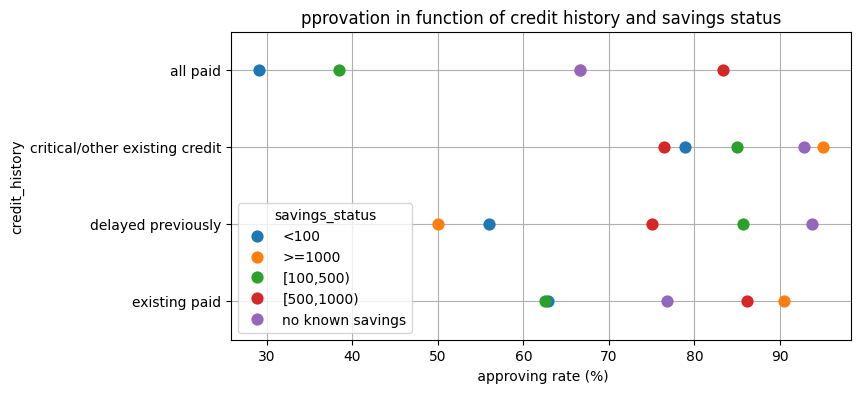

In [20]:
rates_graph(['credit_history', 'savings_status'], graph='line', title='pprovation in function of credit history and savings status')

We realize that people with paid credit or with critical credit history still have to be considered but only if they have savings grower than $100  (wich are few cases according to the bar graphs above) preferably with savings grower than $1000. It can be appreciated that there is a window of opportunity with people with all paid credit history and savings grower than $500.

Also we can study the approving rate behavior with age:

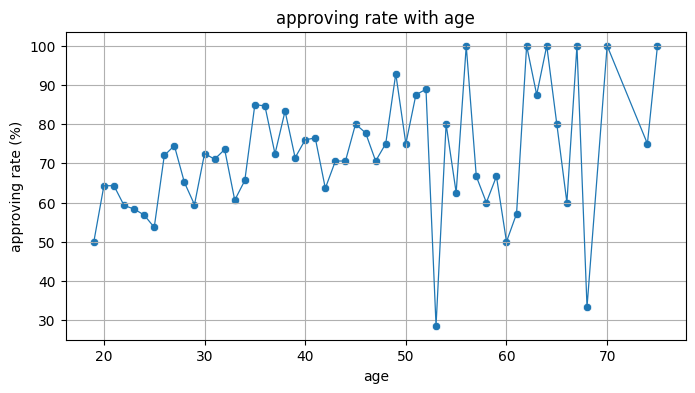

In [21]:
rates_graph(['age'], graph='line', title='approving rate with age')

And we can note an approximately  linear trend for ages lower than 52. Before the 52 there is not a clear trend. It might due to low number of solicitations or a sudden dependence increment on the other variables at this age range. This is one reason to try to apply a machine learning algorithm (other than linear regression); this can be reinforced when we observe the approving rate in function of credit amount: 

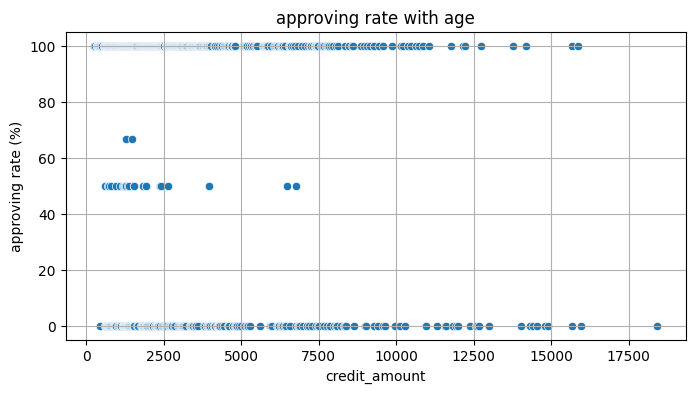

In [22]:
rates_graph(['credit_amount'], graph='scatter', title='approving rate with age')

There is no appreciable trend here. That means approving rate don't depends directly on credit amount and other variables must be considered.

## **4. Machine learning model**

### **4.1 Dataset samples preparation**

Before to apply any machine learning algorithm first we note that some variables has not a great influence over the approving rates:

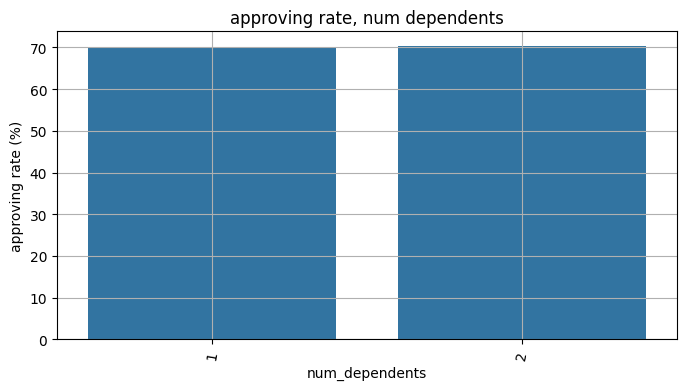

In [23]:
rates_graph(['num_dependents'], graph='bar', title='approving rate, num dependents')
#rates_graph(['own_telephone'], graph='bar', title='approving rate, own telephone')
#rates_graph(['job'], graph='bar', title='approving rate, own telephone')
#rates_graph(['residence_since'], graph='bar', title='approving rate, own telephone')

In all of these cases, approving rate varies in less than 7% regardless of category, so we might discard these variables to avoid overfitting due to the high dimensionality and reduce the computational cost. 

In [24]:
# Drop from dataset
df = df.drop(['residence_since', 'job', 'own_telephone','num_dependents'], axis='columns')

# Drop from categorical variables list and separate the target variable:
print(categorical_var)
for i in [3,4,10]:
    categorical_var.pop(i)
print(categorical_var)

['checking_status', 'purpose', 'personal_status', 'class', 'credit_history', 'job', 'employment', 'other_payment_plans', 'other_parties', 'foreign_worker', 'housing', 'property_magnitude', 'own_telephone', 'savings_status']
['checking_status', 'purpose', 'personal_status', 'credit_history', 'employment', 'other_payment_plans', 'other_parties', 'foreign_worker', 'housing', 'property_magnitude', 'savings_status']


To apply a classification machine learning algorithm, first we can try to transform data with the one hot encoding technique to convert categorical variables (other than target variable) to binary categories: 

In [25]:
print('Bytes without one hot encoding: ', sys.getsizeof(df))
for i in categorical_var:
    # Convert categories to dummy variables: 
    df = pd.concat([df, pd.get_dummies(df[i])], axis='columns')

df = df.drop(categorical_var, axis='columns')

print('Bytes with one hot encoding: ', sys.getsizeof(df))

Bytes without one hot encoding:  745409
Bytes with one hot encoding:  105944


Even this reduced the required storage memory.

With one hot encoding technique we are able to discard 1 dummy variable (because (0,0,1) is equivalent to (0,0)). Usualy the last dummy variable of dataframe is droped:

In [27]:
# Drop last dummy variable
df = df.drop(df.columns[-1], axis='columns')

# Convert all colum labels to str
df.columns = df.columns.astype(str)

# Setting target variable as the first column:
aux = df.pop('class')
df.insert(0, 'class', aux)
df.head(2)

,class,duration,credit_amount,installment_commitment,age,existing_credits,<0,>=200,"[0,200)",no checking,...,own,rent,car,life insurance,no known property,real estate,<100,>=1000,"[100,500)","[500,1000)"
0,1,6,1169.0,4,67,2,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0,48,5951.0,2,22,1,False,False,True,False,...,True,False,False,False,False,True,True,False,False,False


In other side, we normalize numerical variables in order to get a [0,1] scale: 

In [28]:
# Remove the variables with less variable approving rates
numerical_var.pop(2)
numerical_var.pop(4)
print(numerical_var)

['duration', 'installment_commitment', 'age', 'existing_credits', 'credit_amount']


In [29]:
for i in numerical_var:
    
    # Normalize by the max value:
    df[i]=df[i]/df[i].max()

df.head(2)    

,class,duration,credit_amount,installment_commitment,age,existing_credits,<0,>=200,"[0,200)",no checking,...,own,rent,car,life insurance,no known property,real estate,<100,>=1000,"[100,500)","[500,1000)"
0,1,0.083333,0.063450,1.0,0.893333,0.50,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0,0.666667,0.323003,0.5,0.293333,0.25,False,False,True,False,...,True,False,False,False,False,True,True,False,False,False
2,1,0.166667,0.113765,0.5,0.653333,0.25,False,False,False,True,...,True,False,False,False,False,True,True,False,False,False


Now we check if we have a balanced or unbalanced dataset:

In [30]:
df['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

We have an unbalanced dataset, so we balance it by increasing the amount of don't approved solicitations:

In [32]:
# Asegurate target variable with int or categorical type
df['class'] = df['class'].astype(int)

# Balance dataset:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
df_balanced, df_balanced['class'] = ros.fit_resample(df[df.columns[1:]], df['class'])

# check if dataset was balanced:
df_balanced ['class'].value_counts()

class
1    700
0    700
Name: count, dtype: int64

And now we separate data in training and a test sets:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced[df_balanced.columns[:-1]], df_balanced['class'], test_size=0.2, random_state=45)

### **4.2 Selection of machine learning model**

We have a classification problem so we prove classification models:

-***Support vectors classifier:***

In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

-***Decision tree classifier:***

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

-***Gaussian naive Bayes:***

In [36]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

-***Logistic regression:***

In [37]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

-***Random forest clasifier:***

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier( n_estimators = 300 , max_depth =30)
rfs.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=300)

We compare the models' score:

In [45]:
print(svc.score(X_test, y_test) )
print(tree.score(X_test, y_test))
print(naive.score(X_test, y_test))
print(log.score(X_test, y_test))
print(rfs.score(X_test, y_test))

0.7357142857142858
0.8107142857142857
0.7142857142857143
0.7178571428571429
0.8714285714285714


In this case the best model is the Random forest classifier, so we choice it and get the main information about it:

In [40]:
# F1 score:
from sklearn.metrics import f1_score

y_pred = rfs.predict(X_test)
f1_score (y_test, y_pred, labels=[1, 0], average=None)

array([0.87234043, 0.8705036 ])

In [41]:
# Confusion matrix and classification report:
from sklearn.metrics import classification_report, confusion_matrix


print(f'confusion matrix:\n\n', confusion_matrix(y_test, y_pred, labels=[1,0]),'\n')
print(f'report:\n\n', classification_report(y_test, y_pred, labels=[1,0]))

confusion matrix:

 [[123  26]
 [ 10 121]] 

report:

               precision    recall  f1-score   support

           1       0.92      0.83      0.87       149
           0       0.82      0.92      0.87       131

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.88      0.87      0.87       280



We try to optimize the model parameters by repeat the next code with different proposals in the parameters:

In [42]:
from sklearn.model_selection import GridSearchCV
 
parameters = {'n_estimators':[141,142,143], 'max_depth':[42]}
rfs_optimized = RandomForestClassifier()
rfs_optimized_grid = GridSearchCV(rfs_optimized, parameters, cv=8)

# Te best parameters:
rfs_optimized_grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [42], 'n_estimators': [141, 142, 143]})

In [43]:
# The score of fit with the best parameters:
print(rfs_optimized_grid.best_score_)

0.8535714285714286


We apply the best parameters:

In [44]:
model = RandomForestClassifier(n_estimators=142, max_depth=42)
model.fit(X_train, y_train)
print(f'score: {model.score(X_test, y_test)}')
y_model_pred = model.predict(X_test)
f1_score (y_test, y_model_pred, labels=[1, 0], average=None)
print(f'confusion matrix:\n\n', confusion_matrix(y_test, y_model_pred, labels=[1, 0]),'\n')
print(f'report:\n\n', classification_report(y_test, y_model_pred, labels=[1, 0]))

score: 0.875
confusion matrix:

 [[124  25]
 [ 10 121]] 

report:

               precision    recall  f1-score   support

           1       0.93      0.83      0.88       149
           0       0.83      0.92      0.87       131

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.87       280
weighted avg       0.88      0.88      0.88       280



There is an improve in the precision and f1 score.

Finally, we save the model in a file:

In [47]:
import pickle
with open('customers_classification', 'wb') as f:
    pickle.dump(model,f)